In [2]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv('onlinefoods.csv')
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [6]:
df.shape

(388, 13)

In [7]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [51]:
df.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

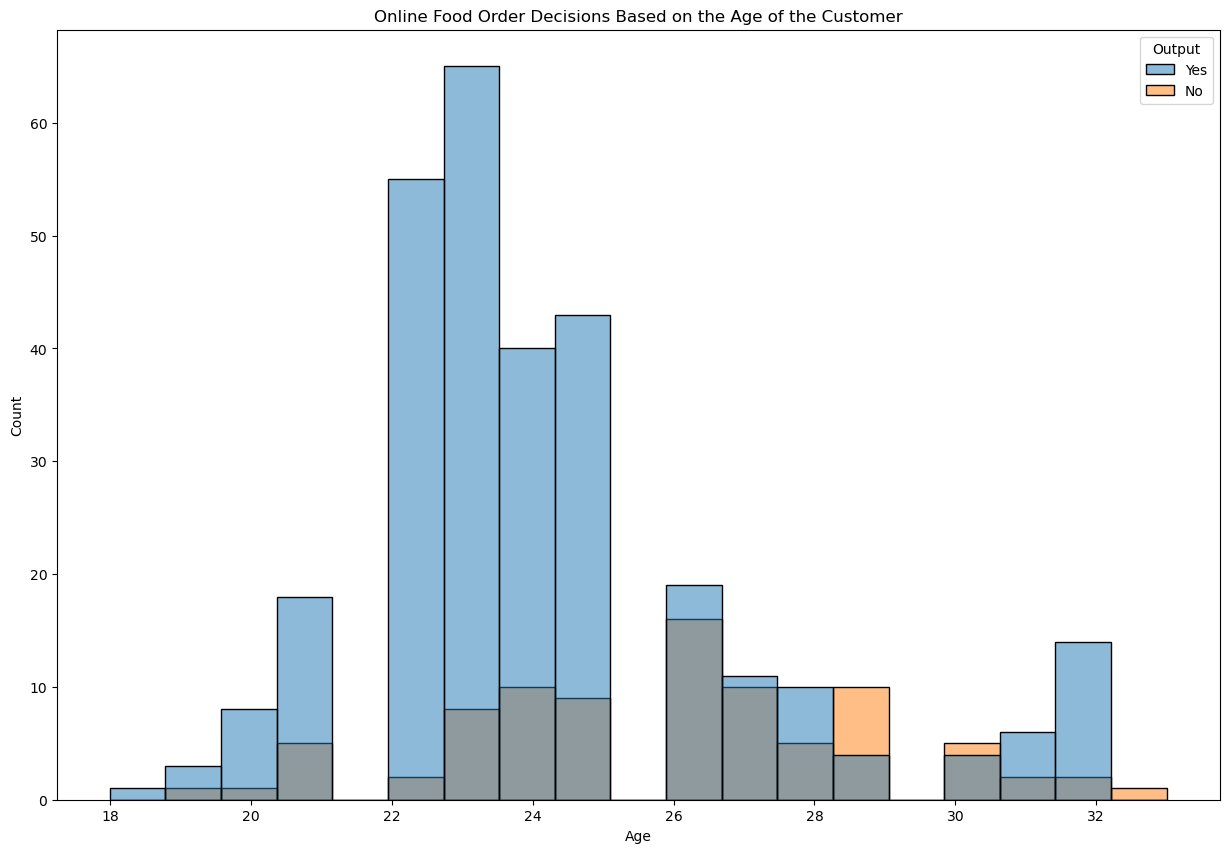

In [8]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.histplot(x="Age", hue="Output", data=df)
plt.show()

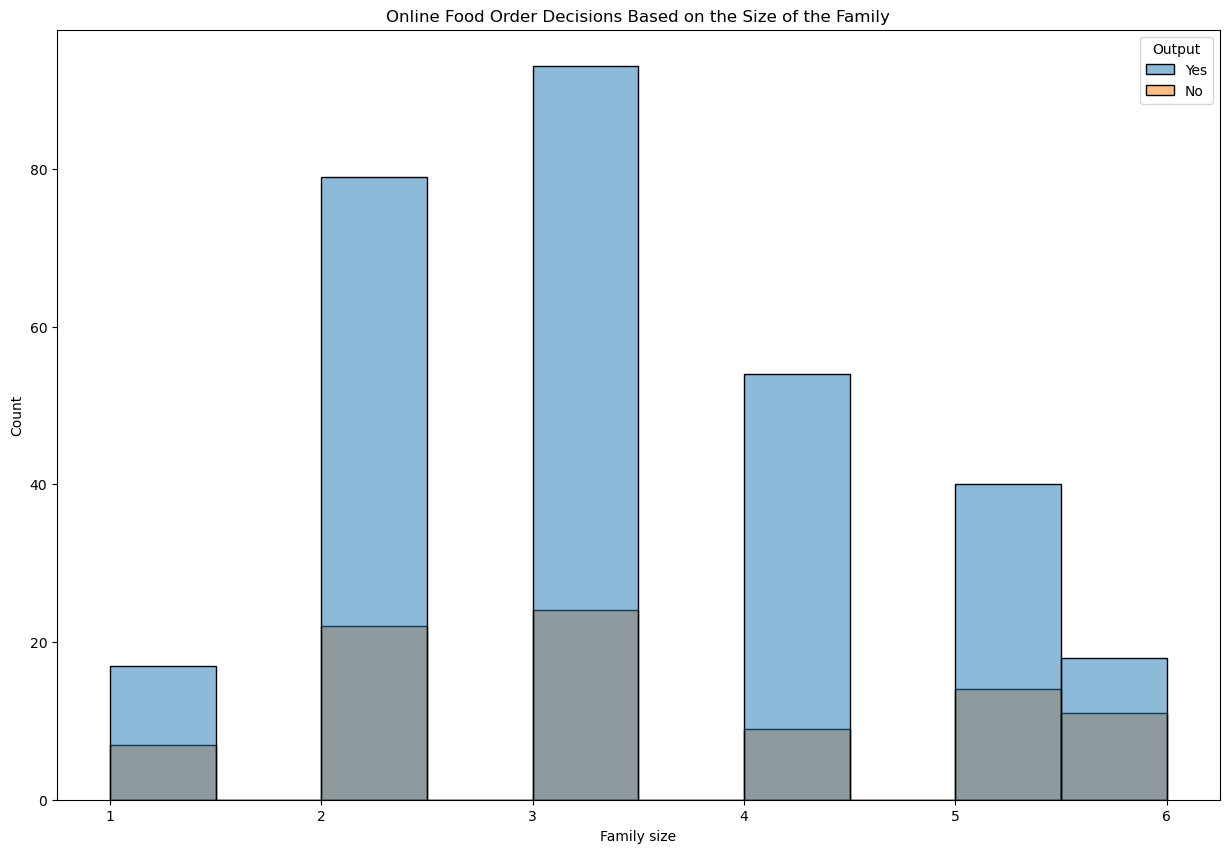

In [9]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Size of the Family")
sns.histplot(x="Family size", hue="Output", data=df)
plt.show()

In [46]:
buying_food_again = df.query("Output == 'Yes'")
buying_food_again.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [53]:
for i, cols in enumerate(df):
    print(f'{i+1} : {df[cols].value_counts()}')
    print(f'----------------------------------------')

1 : 23    73
22    57
25    52
24    50
26    35
21    23
27    21
32    16
28    15
29    14
20     9
30     9
31     8
19     4
18     1
33     1
Name: Age, dtype: int64
----------------------------------------
2 : Male      222
Female    166
Name: Gender, dtype: int64
----------------------------------------
3 : Single               268
Married              108
Prefer not to say     12
Name: Marital Status, dtype: int64
----------------------------------------
4 : Student           207
Employee          118
Self Employeed     54
House wife          9
Name: Occupation, dtype: int64
----------------------------------------
5 : No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: Monthly Income, dtype: int64
----------------------------------------
6 : Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: Educational Qualifications, dtype: int64
-----------------

In [55]:
numeric_cols = df.select_dtypes(include = ['int64', 'float64']).columns
char_cols = df.select_dtypes(include = ['object']).columns

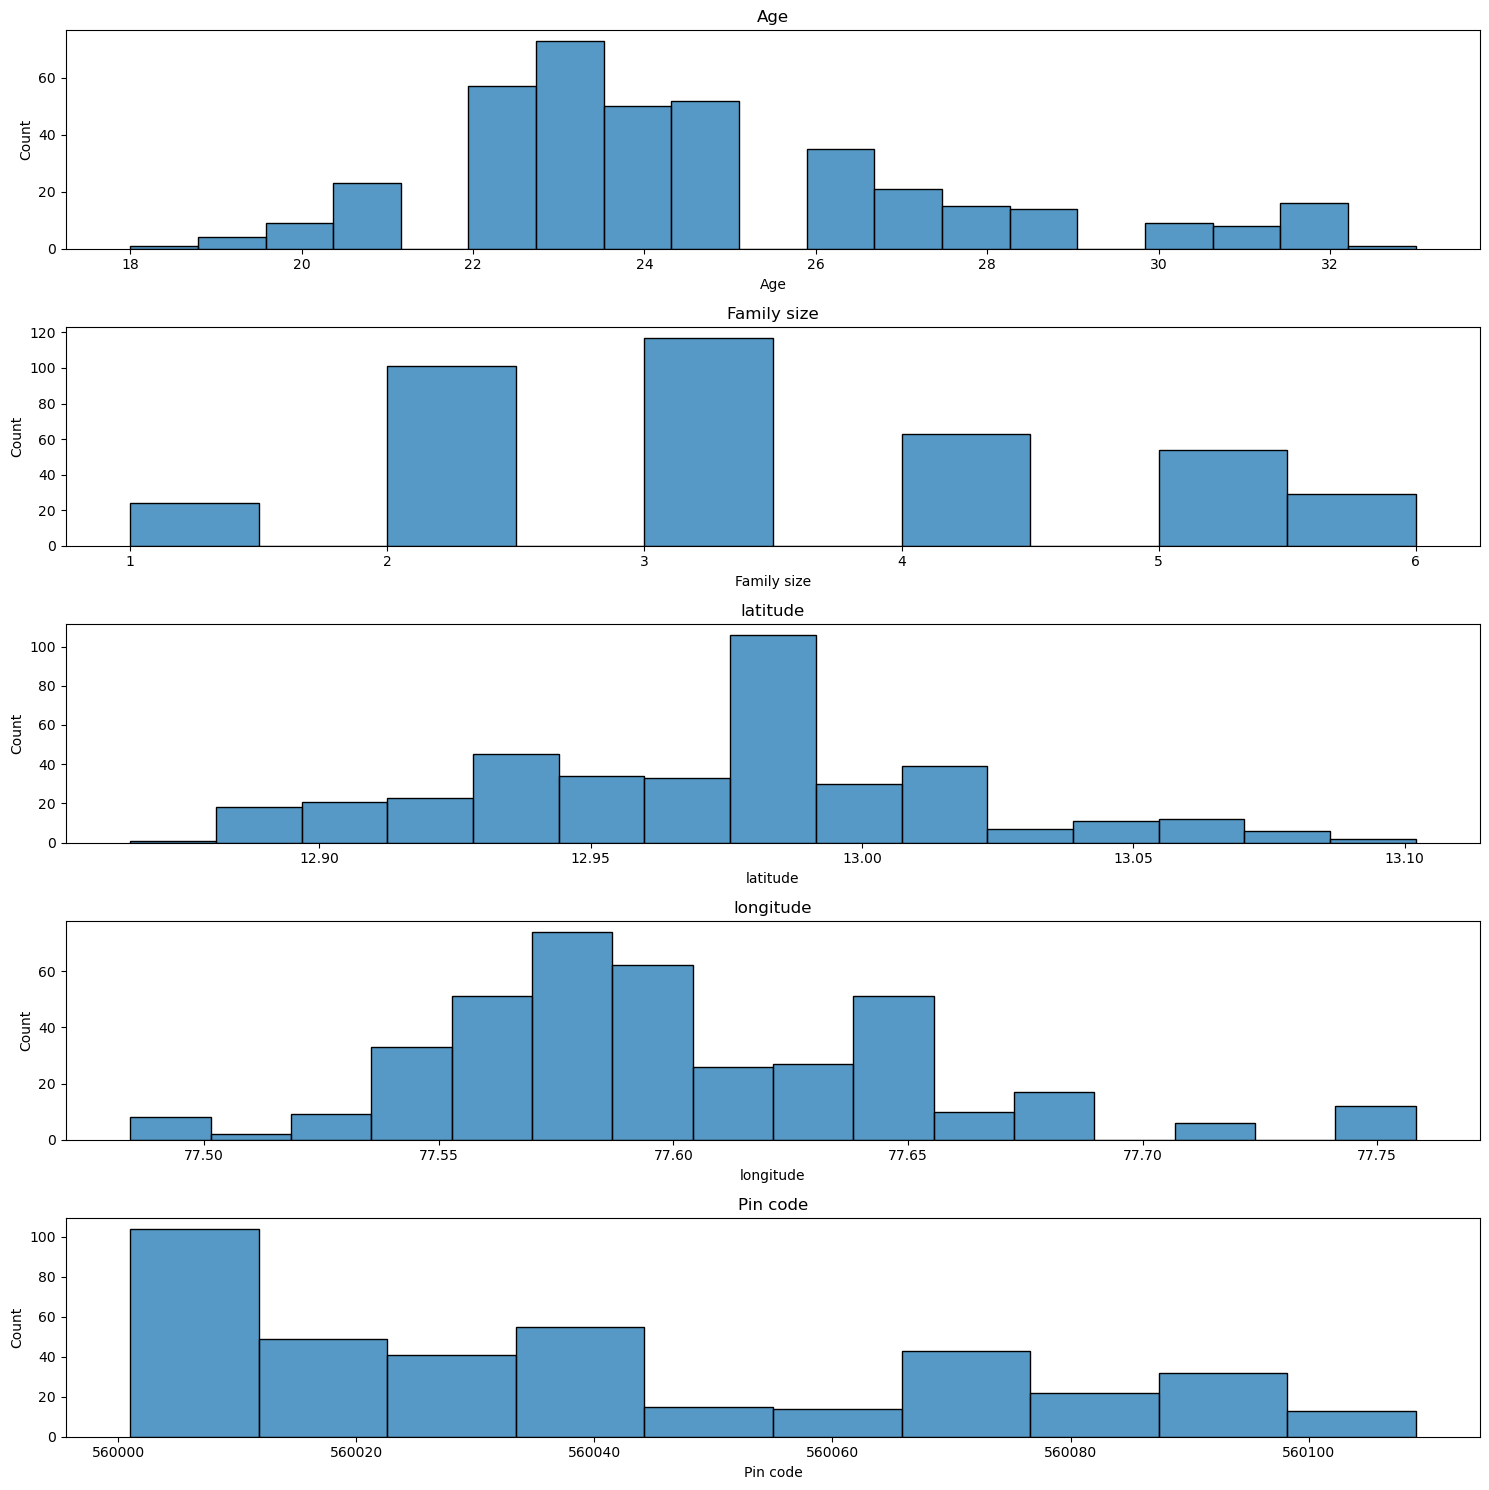

In [56]:
f, ax = plt.subplots(5,1, figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(numeric_cols):
    sns.histplot(data= df, x= cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()    

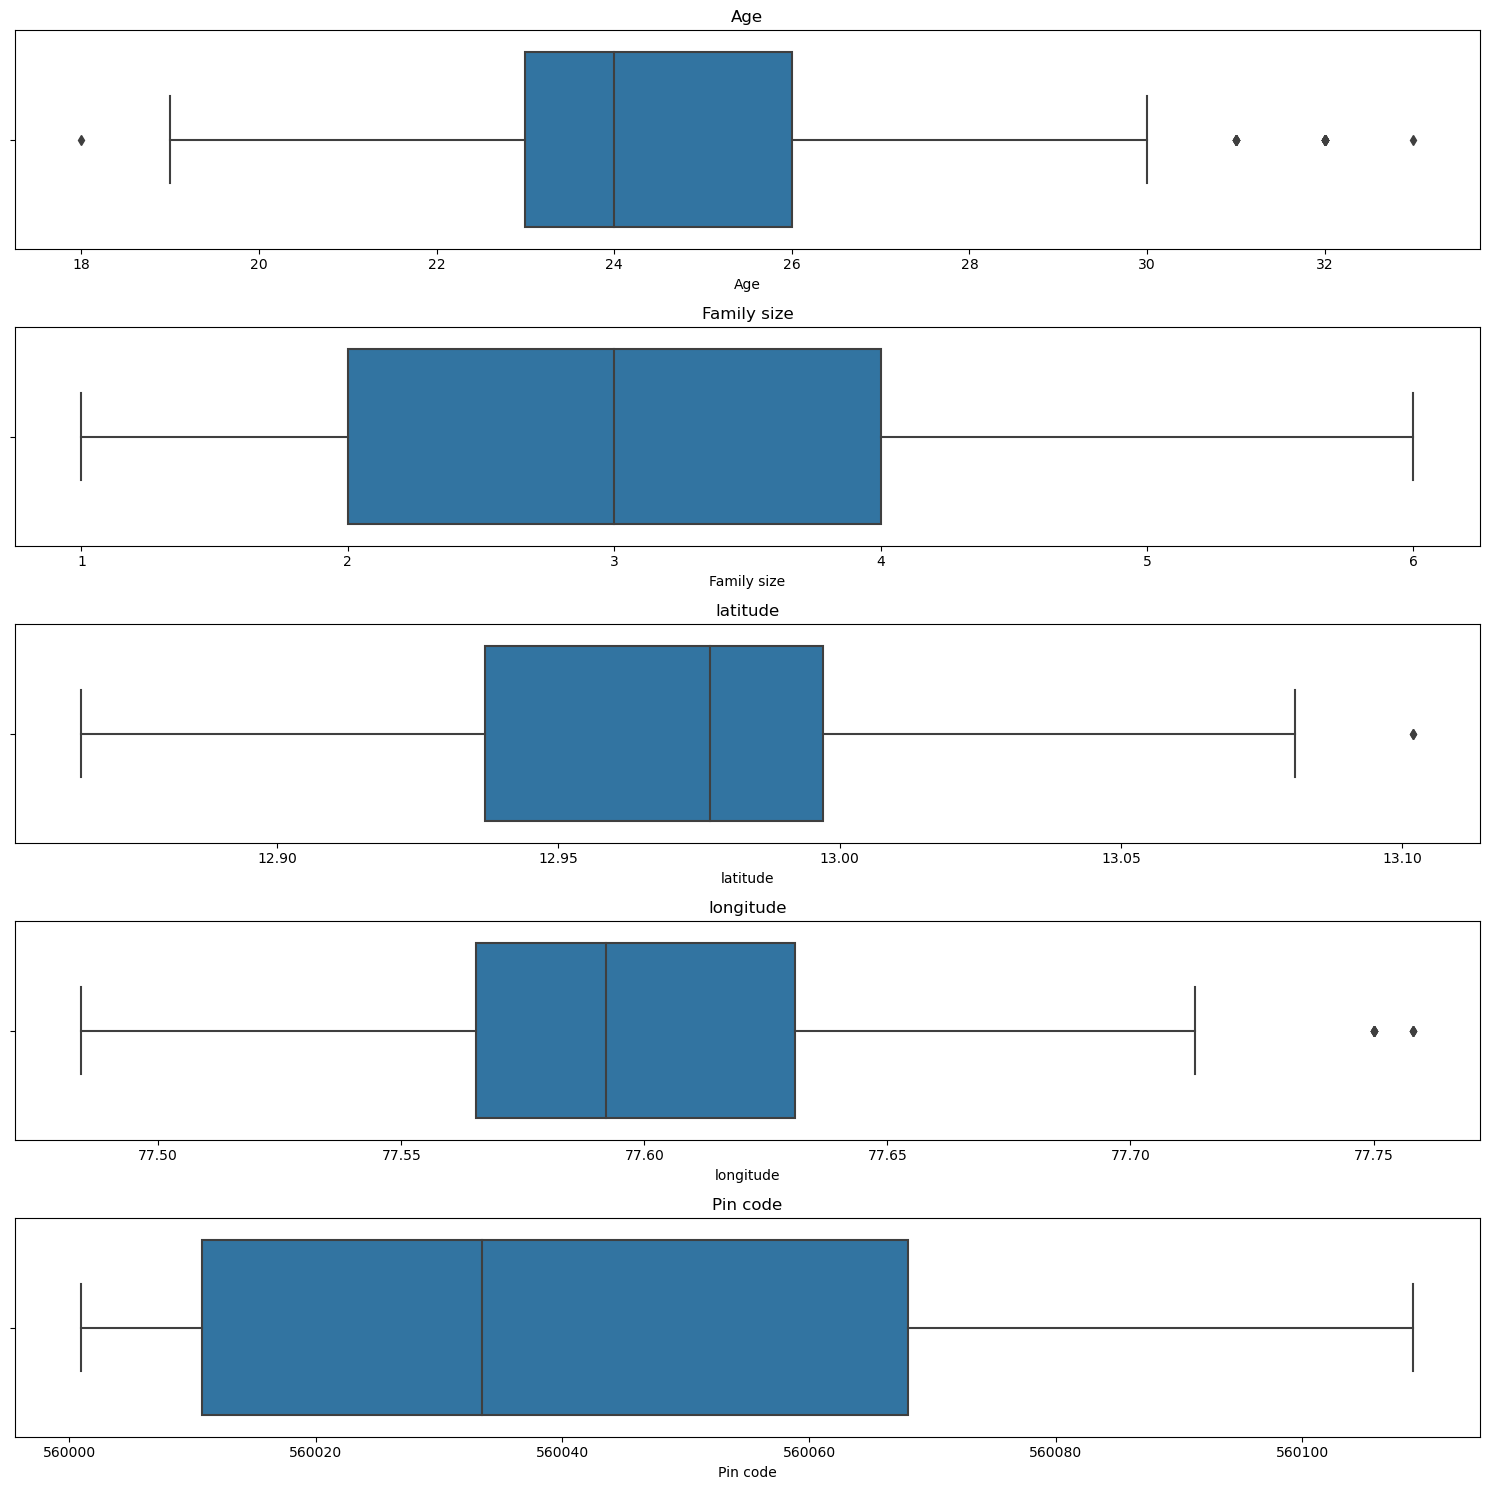

In [57]:
f, ax = plt.subplots(5,1, figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(numeric_cols):
    sns.boxplot(data= df, x = cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

<Figure size 2000x2000 with 0 Axes>

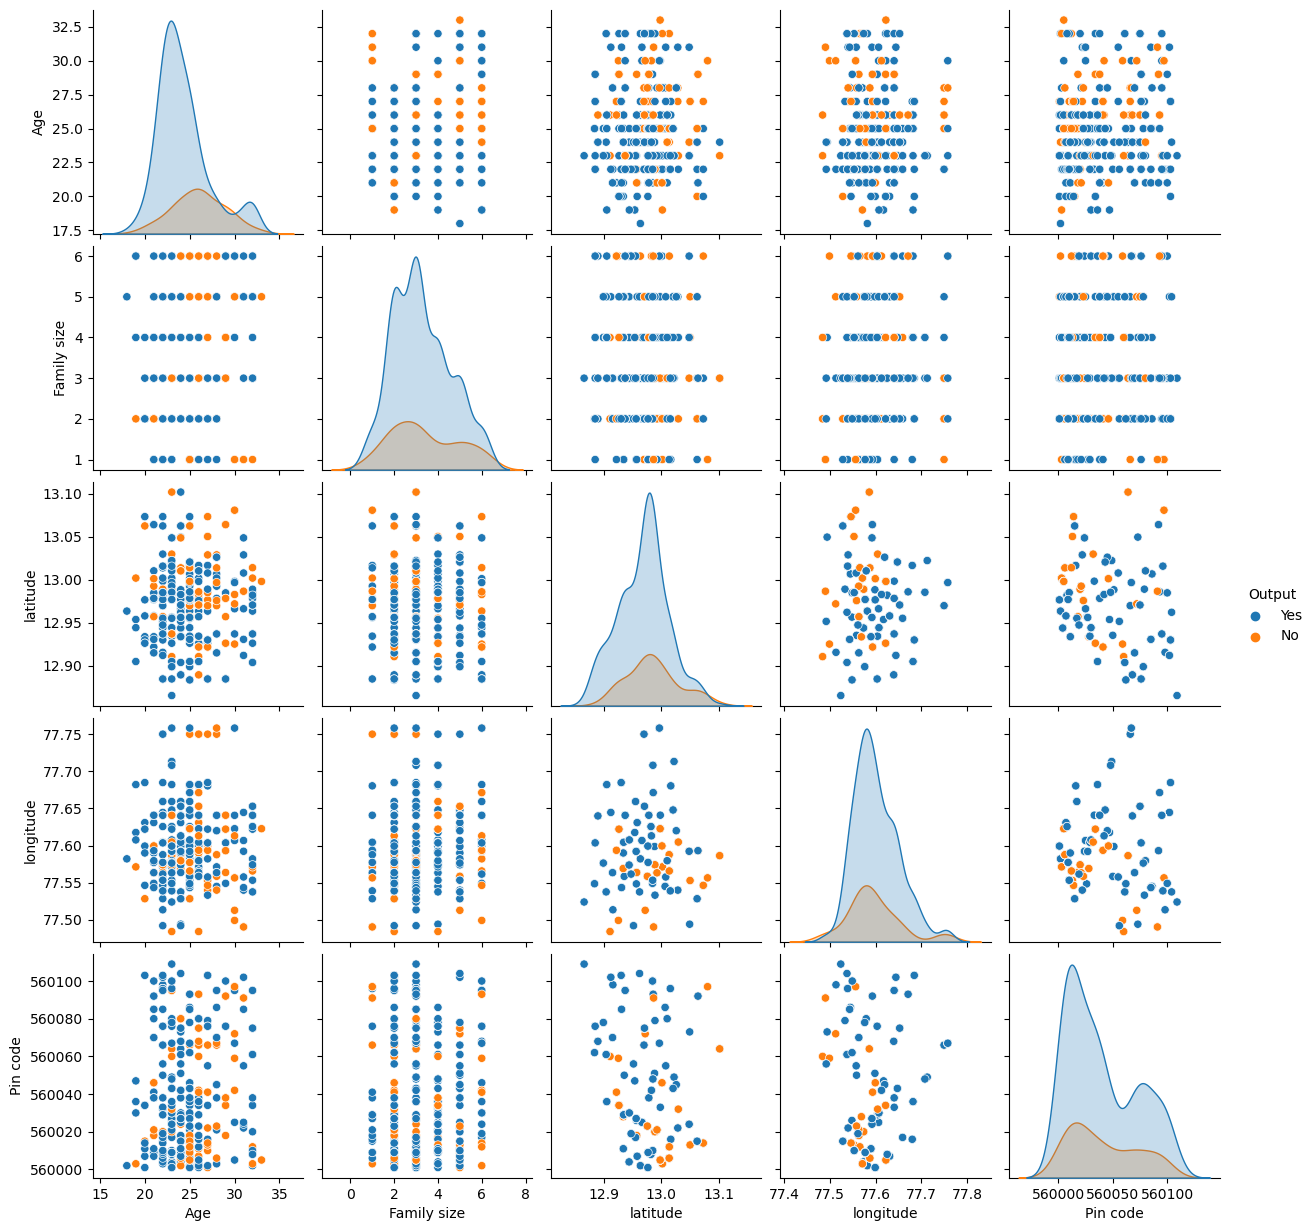

In [58]:
plt.figure(figsize=(20,20))
sns.pairplot(data= df, hue = 'Output' )
plt.show()

In [62]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


In [63]:
def DataTransform(df):

    df = df.drop(['Unnamed: 12'], axis=1)
    
    df['Gender'] = df['Gender'].map({"Male": 1, "Female": 0})
    df['Marital Status'] = df['Marital Status'].map({'Prefer not to say': 0, 'Single': 1, 'Married': 2})
    df['Occupation'] = df['Occupation'].map({'Student': 1, 'Employee': 2, 'Self Employeed': 3, 'House wife': 4})
    df['Educational Qualifications'] = df['Educational Qualifications'].map({'Graduate': 1, 'Post Graduate': 2,'Ph.D': 3, 'School': 4, 'Uneducated': 5})
    df['Monthly Income'] = df['Monthly Income'].map({'No Income': 0, '25001 to 50000': 50000, 'More than 50000': 70000,'10001 to 25000': 25000, 'Below Rs.10000': 10000})
    df['Output'] = df['Output'].map({'Yes': 1, 'No': 0})
    df['Feedback'] = df['Feedback'].map({'Positive': '1', 'Negative ': '0'})
    
    df = df.astype({'Output':'object'})
    
    return df

df = DataTransform(df)


In [64]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,1,1,0,2,4,12.9766,77.5993,560001,1,1
1,24,0,1,1,10000,1,3,12.9770,77.5773,560009,1,1
2,22,1,1,1,10000,2,3,12.9551,77.6593,560017,1,0
3,22,0,1,1,0,1,6,12.9473,77.5616,560019,1,1
4,22,1,1,1,10000,2,4,12.9850,77.5533,560010,1,1


In [65]:
x = df.drop(['Feedback', 'latitude', 'longitude', 'Pin code'], axis=1)
y = df['Feedback']

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
RF = RandomForestClassifier(random_state=42)
LGR = LogisticRegression()
SVM = SVC()

In [68]:
LGR.fit(x_train, y_train)

LogisticRegression()

In [69]:
pred_LGR = LGR.predict(x_test)

In [70]:
confusion_matrix(y_test,pred_LGR)

array([[ 0, 11],
       [ 0, 67]], dtype=int64)

In [71]:
print(f'accuracy : {accuracy_score(y_test,pred_LGR)}')

accuracy : 0.8589743589743589


In [72]:
RF.fit(x_train, y_train)
RandomForestClassifier(random_state=42)
pred_RF = RF.predict(x_test)
confusion_matrix(y_test,pred_RF)

array([[ 6,  5],
       [ 6, 61]], dtype=int64)

In [73]:
print(f'accuracy : {accuracy_score(y_test,pred_RF)}')

accuracy : 0.8589743589743589
